# Importing Libraries

In [192]:
import pandas as pd
import numpy as np
import sweetviz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import re
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [122]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None)
train_set.head()

0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K

In [49]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                       skiprows = 1 , header = None)
test_set.head()                       

0           1       2              3   4                    5   \
0  25     Private  226802           11th   7        Never-married   
1  38     Private   89814        HS-grad   9   Married-civ-spouse   
2  28   Local-gov  336951     Assoc-acdm  12   Married-civ-spouse   
3  44     Private  160323   Some-college  10   Married-civ-spouse   
4  18           ?  103497   Some-college  10        Never-married   

                   6           7       8        9     10  11  12  \
0   Machine-op-inspct   Own-child   Black     Male     0   0  40   
1     Farming-fishing     Husband   White     Male     0   0  50   
2     Protective-serv     Husband   White     Male     0   0  40   
3   Machine-op-inspct     Husband   Black     Male  7688   0  40   
4                   ?   Own-child   White   Female     0   0  30   

               13       14  
0   United-States   <=50K.  
1   United-States   <=50K.  
2   United-States    >50K.  
3   United-States    >50K.  
4   United-States   <=50K.

In [12]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
             'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
             'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [123]:
train_set.columns = col_labels

In [50]:
test_set.columns = col_labels

In [21]:
train_set.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country wage_class  
0          2174             0              40   United-States      <=50K  
1             0             0              13   United-States      <=50K  
2             0             0              40   United-States      <=50K  
3             0             0              40   United-States      <=50K  
4             0             0              40            Cuba      <=50K

In [17]:
print('Train Data - rows:' , train_set.shape[0],'columns:', train_set.shape[1])
print('-----------------------------------------------------------')
print('Test Data - rows:' , test_set.shape[0],'columns:', test_set.shape[1])

Train Data - rows: 32561 columns: 15
-----------------------------------------------------------
Test Data - rows: 16281 columns: 15


# Checking Percentage of missing data

In [19]:
total = train_set.isnull().sum().sort_values(ascending = False)
percent = (train_set.isnull().sum()/train_set.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

wage_class  native_country  hours_per_week  capital_loss  \
Total           0.0             0.0             0.0           0.0   
Percent         0.0             0.0             0.0           0.0   

         capital_gain  sex  race  relationship  occupation  marital_status  \
Total             0.0  0.0   0.0           0.0         0.0             0.0   
Percent           0.0  0.0   0.0           0.0         0.0             0.0   

         education_num  education  fnlwgt  workclass  age  
Total              0.0        0.0     0.0        0.0  0.0  
Percent            0.0        0.0     0.0        0.0  0.0

In [ ]:
# training data is clean

In [20]:
# Checking missing data in the test dataset
print("There is {} missing values in the dataframe".format(test_set.isnull().sum().sum()))

There is 0 missing values in the dataframe


In [ ]:
# test dataset is also clean

# Comparing datatypes of both training and test data

In [118]:
pd.DataFrame([train_set.dtypes, test_set.dtypes] ,index=['train_set','test_set'] ).T

train_set test_set
age                int64    int64
workclass         object   object
fnlwgt             int64    int64
education         object   object
education_num      int64    int64
marital_status    object   object
occupation        object   object
relationship      object   object
race              object   object
sex               object   object
capital_gain       int64    int64
capital_loss       int64    int64
hours_per_week     int64    int64
native_country    object   object
wage_class        object   object

In [147]:
test_set.head()

age   workclass  fnlwgt      education  education_num       marital_status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital_gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital_loss  hours_per_week  native_country wage_class  
0             0              40   United-States     <=50K.  
1             0              50   United-States     <=50K.  
2             0              40   United-States      >50K.  
3             0              40   United-States      >50K.  
4             0              30   United-States     <=50K.

In [ ]:
# Data Cleaning - Removing placeholder '?' from the dataframe

In [155]:
train_df = train_set.replace(" ?" , np.nan).dropna()

In [156]:
test_df = test_set.replace(" ?" , np.nan).dropna()

# EDA with Sweetviz

In [ ]:
result = sweetviz.analyze([train_df,"TrainData"], target_feat = 'wage_class')

In [ ]:
result = sweetviz.analyze([test_set,"TestData"], target_feat = 'wage_class')

In [34]:
train_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [ ]:
# Here i put the train and test set into one so i dont have to keep seperately performing feature engineering
# Also separating cat and num columns

In [262]:
all_data=[train_df, test_df]
cat_list=[]

for data in all_data:
    for colname, colvalue in data.iteritems(): 
        if type(colvalue[1]) == str:
            cat_list.append(colname) 
num_list = data.columns.difference(cat_list)

# Tidying up the wage column

In [ ]:
# train_df['wage_class'] = train_df['wage_class'].replace({" <=50K.": "<=50k" , " >50K.":">50K"})

In [162]:
# test_df['wage_class'] = test_df['wage_class'].replace({" <=50K.": "<=50k" , " >50K.":">50K"})

In [ ]:
# Since the target column is binary , i tried here to create dummy variables for them. Makes sense this way for me.

In [263]:
# I decided to add both train and test to make the cleaning much more easier
for data in all_data:
    data['wage_class']=data['wage_class'].apply(lambda x: x.replace('.', ''))
    data['wage_class']=data['wage_class'].apply(lambda x: x.strip())
    data['wage_class']=data['wage_class'].apply(lambda x: 1 if x=='>50K' else 0)
#     data.drop(['wage_class'], axis=1, inplace=True)

In [264]:
# Checking result - we can see that my target column has now changed
train_df

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  sex  \
0            Never-married        Adm-clerical   Not-in-family   White    1   
1       Married-civ-spouse     Exec-managerial         Husband   White    1   
2                 Divorced   Handlers-cleaners   Not-in-family   White    1   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black    1   
4       Married-civ-spouse      Prof-specialty            Wife   Black    1   
...                    ...                 ...             ...     ...  ...   
32556   Married-civ-spouse        Tech-support            Wife   White    1   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White    1   
32558              Widowed        Adm-clerical       Unmarried   White    1   
32559        Never-married        Adm-clerical       Own-child   White    1   
32560   Married-civ-spouse     Exec-managerial            Wife   White    1   

       capital_gain  capital_loss  hours_per_week  native_country  wage_class  
0              2174             0              40   United-States           0  
1                 0             0              13   United-States           0  
2                 0             0              40   United-States           0  
3                 0             0              40   United-States           0  
4                 0             0              40            Cuba           0  
...             ...           ...             ...             ...         ...  
32556             0             0              38   United-States           0  
32557             0             0              40   United-States           1  
32558             0             0              40   United-States           0  
32559             0             0              20   United-States           0  
32560         15024             0              40   United-States           1  

[30162 rows x 15 columns]

In [ ]:
# replacing the placeholder "?" with NaN values and dropping all the null values in the dataframe
for data in all_data:
    for i in data.columns:
        data[i].replace(' ?', np.nan, inplace=True)
    data.dropna(inplace=True)

In [182]:
train_df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  wage_class  
0          2174             0              40   United-States           0  
1             0             0              13   United-States           0  
2             0             0              40   United-States           0  
3             0             0              40   United-States           0  
4             0             0              40            Cuba           0

In [164]:
train_set2 = train_df[:]

In [165]:
test_set2 = test_df.copy()

In [240]:
# Run this when something goes wrong so u dont have to run everything from above
train_df = train_set2.copy()

In [ ]:
test_df = test_set2.copy()

# Histogram for Age

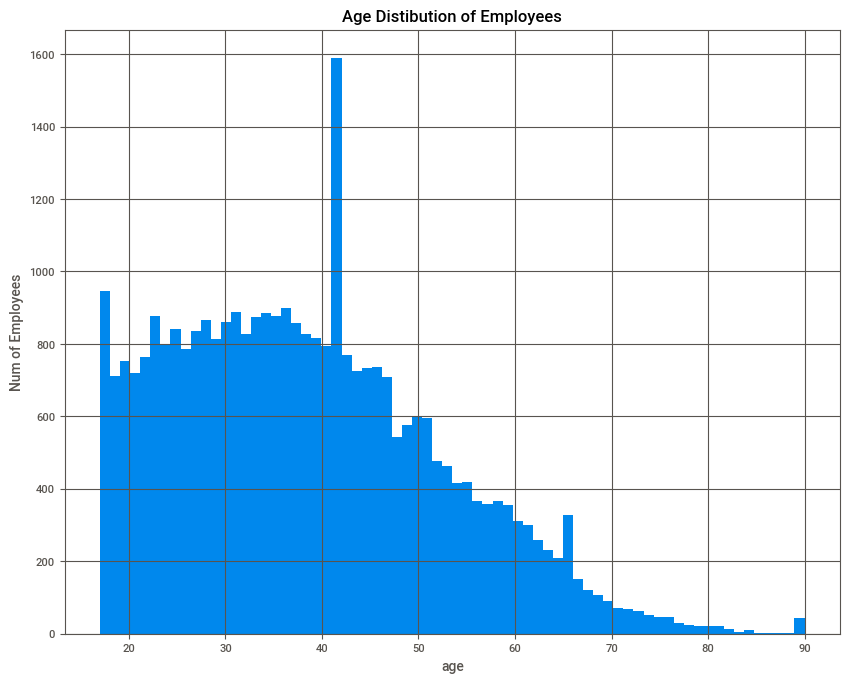

In [72]:
plt.figure(figsize=(10,8))
train_set['age'].hist(bins=70)
plt.title("Age Distibution of Employees")
plt.xlabel("age")
plt.ylabel("Num of Employees")
plt.show()

# Observation : Age of employees is rightly skewed and we also have some outliers

In [ ]:
# Exploring further Age Distibution

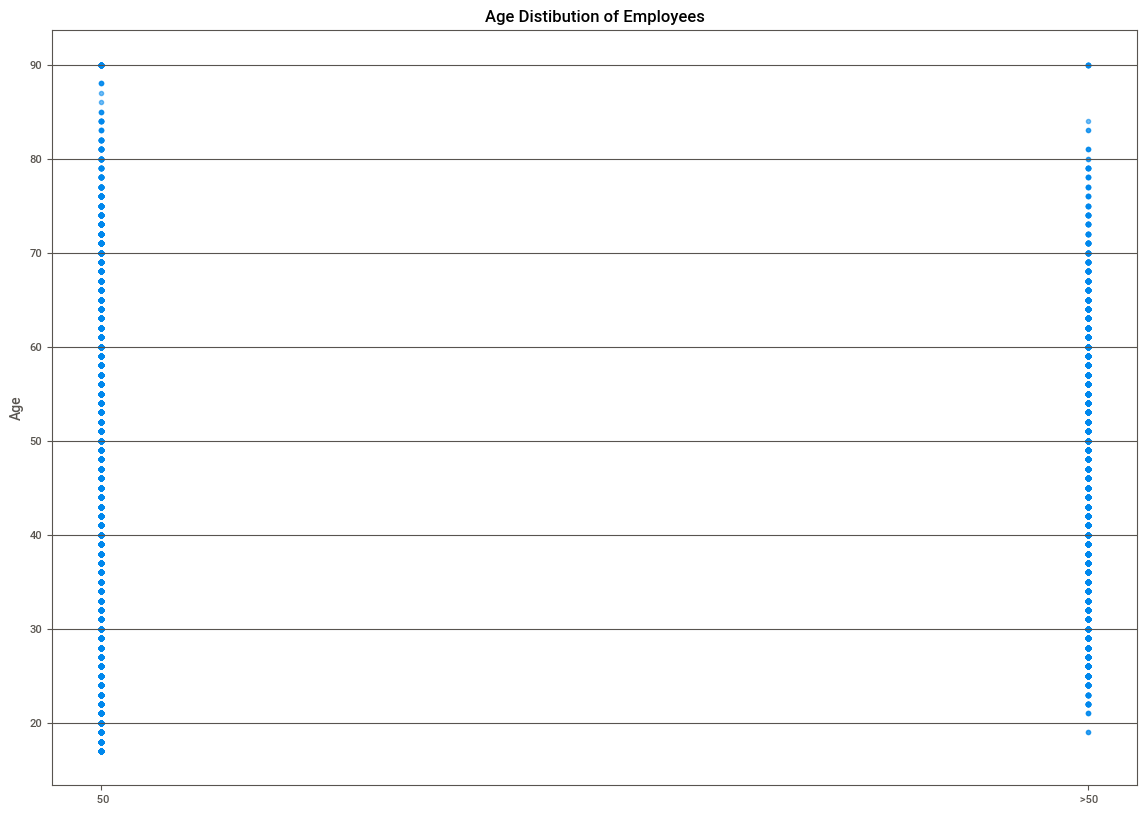

In [74]:
plt.figure(figsize=(14,10))
plt.scatter(train_set['wage_class'], train_set['age'] , alpha=.55)
plt.title("Age Distibution of Employees")
# plt.xlabel("age")
plt.ylabel("Age")
plt.grid(b=True , which = 'major', axis='y')
plt.show()

# Explore the Education columns

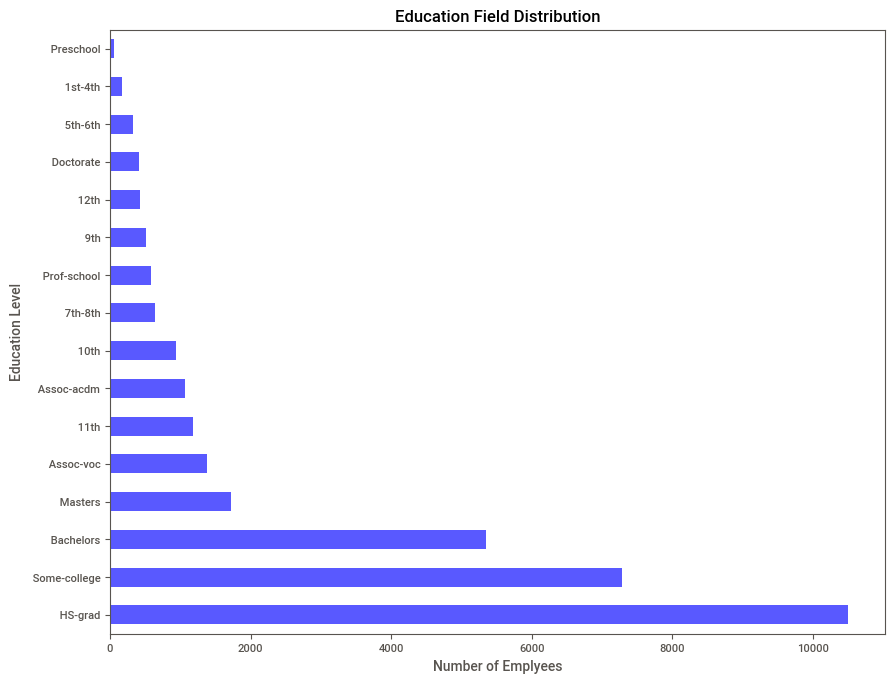

In [94]:
plt.figure(figsize=(10,8))
train_set['education'].value_counts().plot(kind='barh', color='blue',alpha=.65)
plt.title("Education Field Distribution")
plt.xlabel("Number of Emplyees")
plt.ylabel("Education Level")
plt.show()

# Explore data for Marital Status

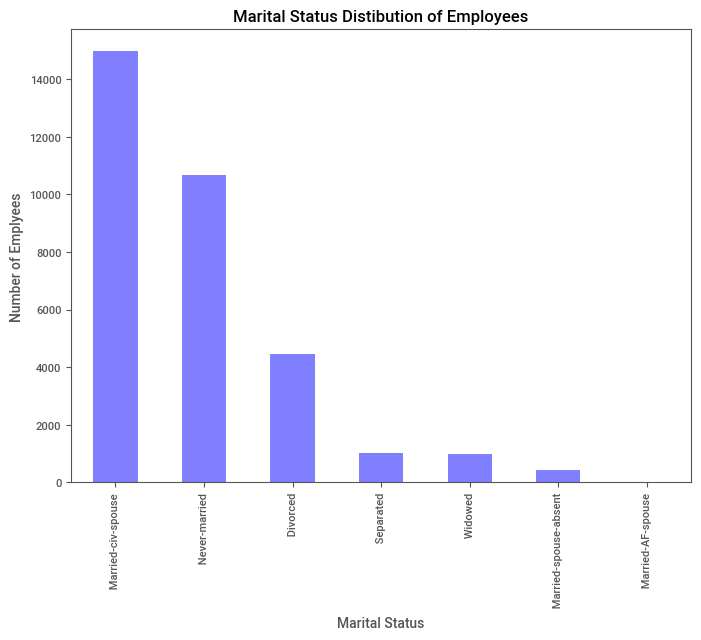

In [93]:
plt.figure(figsize=(8,6))
train_set['marital_status'].value_counts().plot(kind='bar', color='blue' , alpha=.5)
# plt.plot(kind='bar', color='b', alpha=.5)
plt.title("Marital Status Distibution of Employees")
plt.xlabel("Marital Status")
plt.ylabel("Number of Emplyees")
plt.show()

# Gender Distribution in the dataframe

In [102]:
#labels
lab = train_df["sex"].value_counts().keys().tolist()
#values
val = train_df["sex"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Gender distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

![](newplot.png)

# Salary distribution between male and Female

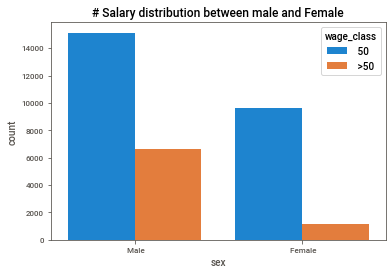

In [107]:
sns.countplot(x='sex' , hue = 'wage_class' , data = train_df)
plt.title("# Salary distribution between male and Female")
plt.show()

# Salary Distrubtion of Workclass

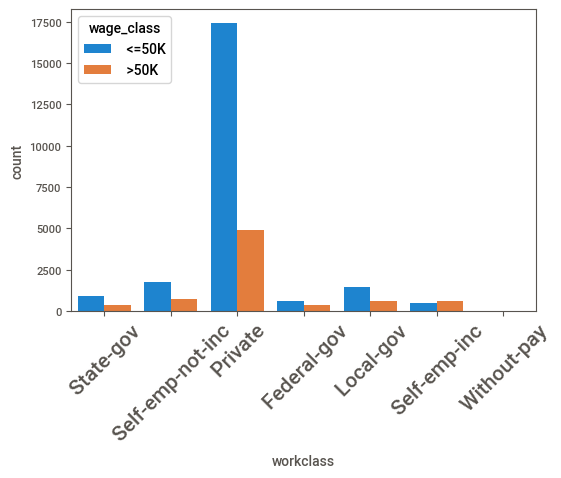

In [167]:
s = sns.countplot("workclass" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

In [ ]:
# Note : we can see we have some placeholders in the columns

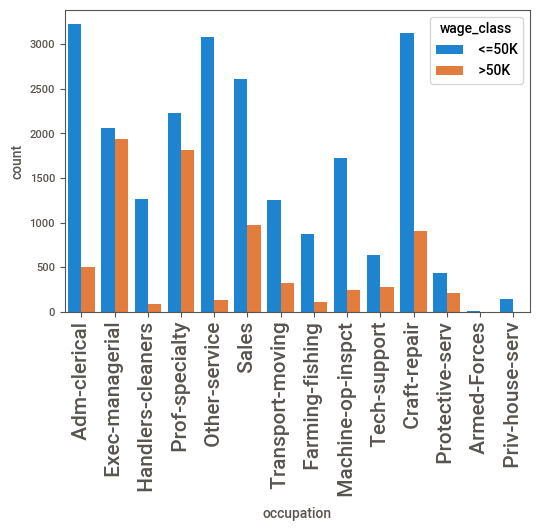

In [168]:
s = sns.countplot("occupation" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 'vertical' , fontsize = 15)
plt.show()

# Salary distribution based on education

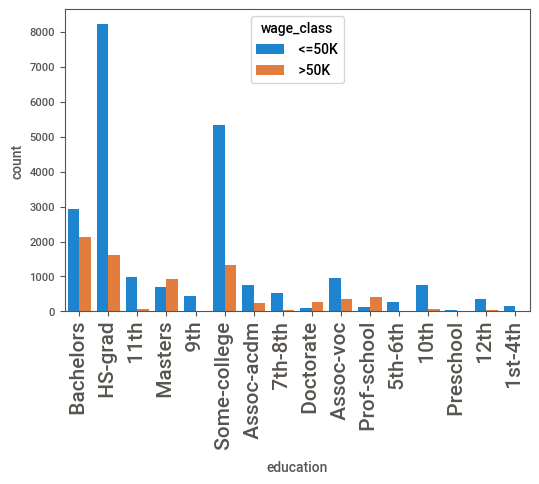

In [169]:
s = sns.countplot("education" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 90 , fontsize = 15)
plt.show()

# Salary Distribution , Above and Below 50k

In [170]:
#labels
lab = train_df['wage_class'].value_counts().keys().tolist()
#values
val = train_df["wage_class"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Wage class distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

![](newplot(1).png)

# Age vs Wage class

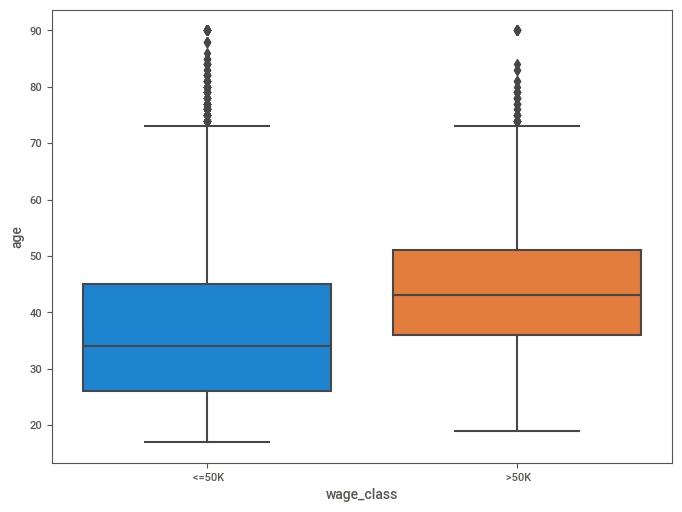

In [174]:
plt.figure(figsize = (8,6))
sns.boxplot(x='wage_class' , y = 'age' , data = train_df)
plt.show()

In [ ]:
# Salary vs Race

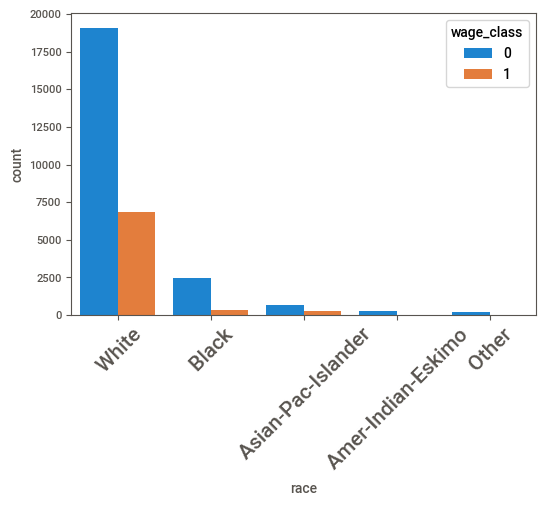

In [190]:
s = sns.countplot("race" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

# Feature Engineering 

In [183]:
cat_list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [202]:
# onte i run this twice since there are two wage_class cloumns. 1 form the train and 1 from the test data
cat_list.remove('wage_class')

In [203]:
cat_list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [184]:
num_list

Index(['age', 'capital_gain', 'capital_loss', 'education_num', 'fnlwgt',
       'hours_per_week'],
      dtype='object')

# Note : Since we have Many categrocal columns - hence I need to create dummy variables for them all

In [253]:
train_df.sex.unique()

array([1])

In [189]:
train_df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [193]:
train_df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [194]:
train_df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
# Function to convert gender columns

In [254]:
# def map_sex(column):
#     mapped = []
#     for value in column:
#         if value == ' Female':
#             mapped.append(0)
#         else:
#             mapped.append(1)
#     return mapped

In [255]:
# train_df['sex'] = map_sex(train_df['sex'])
# test_df['sex'] = map_sex(test_df['sex'])

In [259]:
for data in all_data:
    data['sex']=data['sex'].apply(lambda x: 1 if x==" Male" else 0)
    data['race']=data['race'].apply(lambda x: 1 if x==" White" else 0)
    data['marital_status']=data['marital_status'].apply(lambda x: " Married" if x.startswith('Married',1) else 'Single')
    data['marital_status']=data['marital_status'].apply(lambda x: 1 if x==" Married" else 0)


In [257]:
train_df.sex.unique()

array([1])

In [260]:
train_df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)